In [1]:
import numpy as np
import pandas as pd
from spectral import *
import matplotlib.pyplot as plt
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable

image = np.load('salinas_image.npy')
gt = np.load('salinas_labels.npy')

In [2]:
crop_type = ["Undefined", "Brocoli_green_weeds_1", "Brocoli_green_weeds_2", "Fallow","Fallow_rough_plow", "Fallow_smooth", "Stubble","Celery", "Grapes_untrained","Soil_vinyard_develop","Corn_senesced_green_weeds","Lettuce_romaine_4wk", "Lettuce_romaine_5wk",
        "Lettuce_romaine_6wk", "Lettuce_romaine_7wk", "Vinyard_untrained", "Vinyard_vertical_trellis"]

In [3]:
class HSI_Classification():
    def __init__(self, image, gt, labels):
        self.init(image, gt, labels)
            
    def init(self, image, gt, labels):
        self.image = image
        self.gt = gt
        self.labels = labels
        self.rows, self.cols, self.bands = self.image.shape
        self.pixels = self.rows*self.cols
        self.imr = None
        self.gtr = None
        self.bands_list = []
        for i in range(0,self.bands):
            self.bands_list.append(self.image[:,:,i])
        self.df = self.df_setup()
        self.pixel_count = []
        for i in range(0, self.number_of_different_categories()): 
            self.pixel_count.append((gt==i).sum())
            
    
    def df_setup(self):
        self.imr = np.reshape(self.image,(self.pixels,self.bands))
        self.gtr = np.reshape(self.gt,(self.pixels, 1))
        self.df = pd.DataFrame(self.imr)
        self.df['gt'] = pd.DataFrame(self.gtr)
        #self.df['labels'] = self.df['gt'].apply(assign_labels(self.labels))
        self.df = self.df[self.df['gt']!=0]
        self.df = self.df.reset_index(drop=True)
        return self.df
    
    def return_df(self):
        return self.df
    
    def extract_X_y(self):
        X = pd.DataFrame(self.df.iloc[:,:-1])
        y = pd.DataFrame(self.df.iloc[:,-1])
        return X,y
    
    def draw_bands(self):
        fig, axes = plt.subplots(1,3,figsize=(10,10))
        (ax_3, ax_65, ax_155) = axes

        ax_3.imshow(self.bands_list[2])
        ax_3.set_title('Band 3')

        ax_65.imshow(self.bands_list[64])
        ax_65.set_title('Band 65')

        ax_155.imshow(self.bands_list[154])
        ax_155.set_title('Band 155')
        ;
    
    def return_shape(self):
        return self.rows, self.cols, self.bands
    
    def number_of_different_categories(self):
        return len(np.unique(gt))
    
    def draw_labels(self):
        plt.imshow(list(self.image[:,:,random.randint(0,203)]))
        plt.imshow(list(self.gt), cmap='Paired', alpha=0.4, label = 'Επισημειώσεις')
        plt.title('Eπισημείωσεις')
        plt.legend(self.labels, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show;
        
    def return_pixel_count(self):
        return self.pixel_count
    
    def get_random_pixels(self):
        random_pixels = []
        for i in range(1, 17):
            indeces = np.where(self.gtr==i)
            random_pixels.append(indeces[0][np.random.randint(0, len(indeces[0]))])
        return random_pixels
    
    def plot_pixel_signature(self, random_pixels):
        for i in range(0, 16):    
            plt.plot(self.imr[random_pixels[i],:])
            plt.legend(np.delete(self.labels,0), loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title('Random Pixel for Every Type (Signature)')
        ;
        
    def get_corr_matrix(self):
        return pd.DataFrame(self.df.iloc[:,:-1]).corr()
    
    def plot_pixel(pixel, n):
        ax = plt.gca()
        im = ax.imshow(pixel.reshape(10, 20), cmap = 'jet')
        plt.title(f'pixel - {n}')
        plt.axis('off')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        plt.show()

In [4]:
hsi = HSI_Classification(image, gt, crop_type)

In [5]:
df = hsi.return_df()

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,gt
0,369,558,787,1387,1765,1852,1820,2038,2372,2460,...,100,122,94,58,83,59,30,5,14,6
1,441,474,787,1344,1706,1852,1800,2022,2328,2473,...,104,116,98,64,87,55,32,11,25,6
2,441,558,787,1344,1706,1830,1781,2022,2343,2473,...,102,116,96,60,83,63,26,11,16,6
3,441,558,787,1344,1735,1830,1800,2038,2386,2512,...,94,118,104,56,85,51,32,7,12,6
4,441,474,787,1344,1735,1875,1858,2104,2430,2564,...,102,114,94,54,81,55,26,9,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54124,299,483,540,921,1116,1148,1067,1136,1253,1256,...,29,37,36,18,26,17,9,4,15,16
54125,299,316,540,879,1116,1125,1067,1136,1253,1269,...,29,35,26,16,24,15,7,12,2,16
54126,299,232,474,836,1116,1125,1028,1119,1239,1269,...,21,26,21,12,15,11,9,0,6,16
54127,299,316,540,836,1087,1125,1048,1119,1253,1243,...,25,28,26,14,28,17,5,2,4,16


In [41]:
df.iloc[:,-1].values

array([ 6,  6,  6, ..., 16, 16, 16], dtype=uint8)

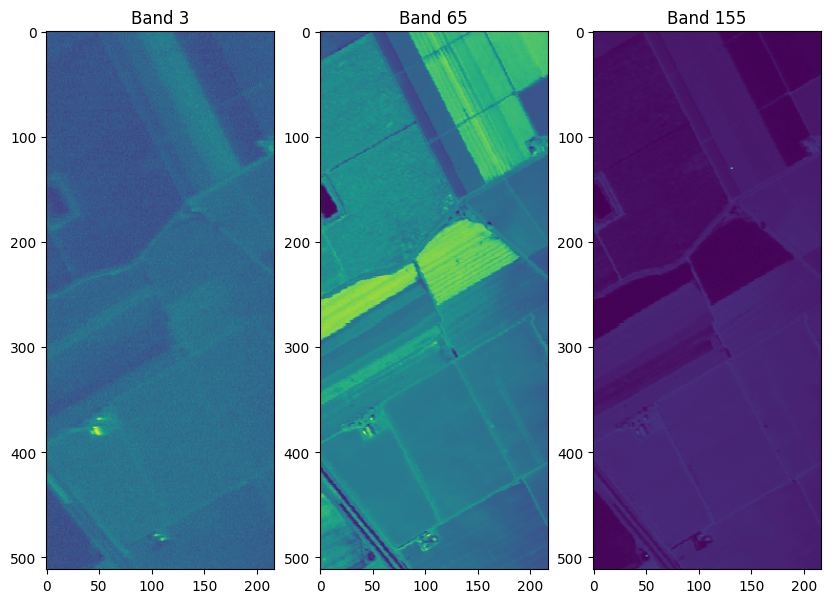

In [8]:
hsi.draw_bands()

In [9]:
height, width, bands = hsi.return_shape()
print(height, width, bands)

512 217 204


In [10]:
hsi.number_of_different_categories()

17

In [11]:
X, y = hsi.extract_X_y()

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,203
0,369,558,787,1387,1765,1852,1820,2038,2372,2460,...,118,100,122,94,58,83,59,30,5,14
1,441,474,787,1344,1706,1852,1800,2022,2328,2473,...,116,104,116,98,64,87,55,32,11,25
2,441,558,787,1344,1706,1830,1781,2022,2343,2473,...,113,102,116,96,60,83,63,26,11,16
3,441,558,787,1344,1735,1830,1800,2038,2386,2512,...,116,94,118,104,56,85,51,32,7,12
4,441,474,787,1344,1735,1875,1858,2104,2430,2564,...,116,102,114,94,54,81,55,26,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54124,299,483,540,921,1116,1148,1067,1136,1253,1256,...,36,29,37,36,18,26,17,9,4,15
54125,299,316,540,879,1116,1125,1067,1136,1253,1269,...,30,29,35,26,16,24,15,7,12,2
54126,299,232,474,836,1116,1125,1028,1119,1239,1269,...,24,21,26,21,12,15,11,9,0,6
54127,299,316,540,836,1087,1125,1048,1119,1253,1243,...,24,25,28,26,14,28,17,5,2,4


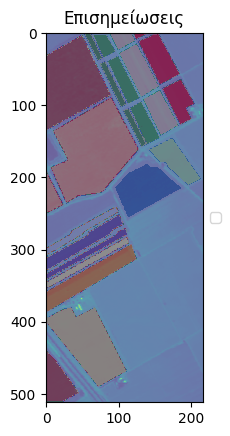

In [13]:
hsi.draw_labels()

In [14]:
hsi.pixel_count

[56975,
 2009,
 3726,
 1976,
 1394,
 2678,
 3959,
 3579,
 11271,
 6203,
 3278,
 1068,
 1927,
 916,
 1070,
 7268,
 1807]

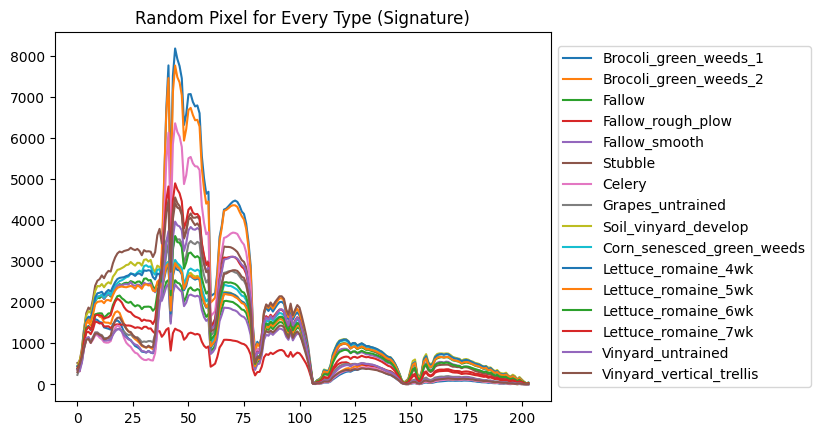

In [15]:
hsi.plot_pixel_signature(hsi.get_random_pixels())

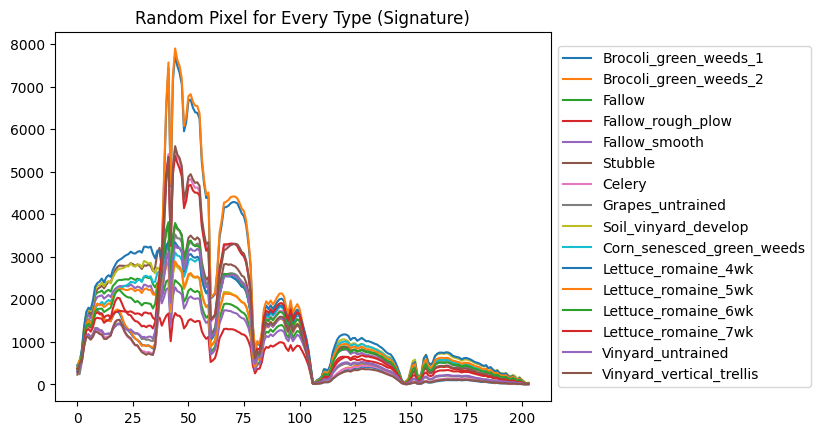

In [16]:
hsi.plot_pixel_signature(hsi.get_random_pixels())

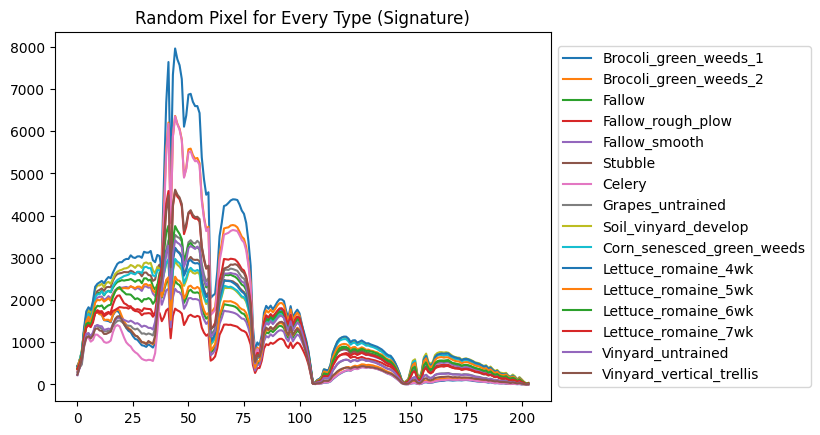

In [17]:
hsi.plot_pixel_signature(hsi.get_random_pixels())

''

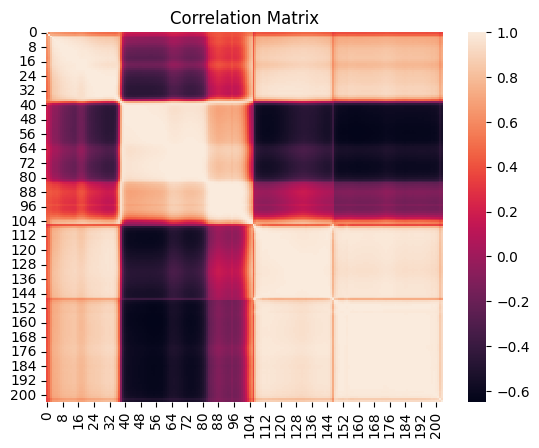

In [18]:
corr_matrix = hsi.get_corr_matrix()
import seaborn as sns 
ax = sns.heatmap(corr_matrix)
ax.set_title('Correlation Matrix')
;